In [2]:
import geopandas as gpd
from simpledbf import Dbf5
import matplotlib.pyplot as plt
import fiona.crs
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
%pylab inline

PyTables is not installed. No support for HDF output.
Populating the interactive namespace from numpy and matplotlib


In [3]:
ct = gpd.GeoDataFrame.from_file('census_data.shp')

In [4]:
ct.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GEOID_Data,Shape_Leng,Shape_Area,Majority_r,geometry
0,1,36,005,017500,2,360050175002,Block Group 2,G5030,S,23694.0,0.0,+40.8296335,-073.9152037,15000US360050175002,0.006462,0.000003,Black or African American,POLYGON ((-73.91398799994619 40.82997999977721...
1,2,36,005,014100,1,360050141001,Block Group 1,G5030,S,55934.0,0.0,+40.8245444,-073.9131209,15000US360050141001,0.014530,0.000006,Black or African American,POLYGON ((-73.91130999965674 40.82484899968165...
2,3,36,005,014500,1,360050145001,Block Group 1,G5030,S,47026.0,0.0,+40.8309816,-073.9050870,15000US360050145001,0.010131,0.000005,Black or African American,POLYGON ((-73.90343499982532 40.83221600036819...
3,4,36,005,007500,2,360050075002,Block Group 2,G5030,S,109058.0,0.0,+40.8202395,-073.9080678,15000US360050075002,0.014512,0.000012,Black or African American,POLYGON ((-73.90645699979069 40.82171499994735...
4,5,36,005,041800,1,360050418001,Block Group 1,G5030,S,140793.0,0.0,+40.8989195,-073.8564428,15000US360050418001,0.023164,0.000015,Black or African American,POLYGON ((-73.85699699961179 40.89950399980978...


In [5]:
ct = ct[['GEOID_Data','Majority_r','geometry']]

In [6]:
dbf = Dbf5('census_income.dbf')
census_income_df = dbf.to_dataframe()

In [7]:
census_income_df = census_income_df[['GEOID','B19301e1']]

In [8]:
dbf = Dbf5('census_race.dbf')
census_race_df = dbf.to_dataframe()

In [9]:
census_race_df = census_race_df[['GEOID','B02001e1']]

In [10]:
ct_combined = ct.merge(census_race_df,left_on='GEOID_Data',right_on='GEOID')
ct_combined = ct_combined.merge(census_income_df,left_on='GEOID_Data',right_on='GEOID')
ct_combined.rename(columns={'B02001e1':'population','B19301e1':'per_capita_income'},inplace=True)

In [11]:
ct_combined.head()

,GEOID_Data,Majority_r,geometry,GEOID_x,population,GEOID_y,per_capita_income
0,15000US360050175002,Black or African American,POLYGON ((-73.91398799994619 40.82997999977721...,15000US360050175002,1110.0,15000US360050175002,9306.0
1,15000US360050141001,Black or African American,POLYGON ((-73.91130999965674 40.82484899968165...,15000US360050141001,1445.0,15000US360050141001,16677.0
2,15000US360050145001,Black or African American,POLYGON ((-73.90343499982532 40.83221600036819...,15000US360050145001,2003.0,15000US360050145001,12639.0
3,15000US360050075002,Black or African American,POLYGON ((-73.90645699979069 40.82171499994735...,15000US360050075002,2731.0,15000US360050075002,14588.0
4,15000US360050418001,Black or African American,POLYGON ((-73.85699699961179 40.89950399980978...,15000US360050418001,936.0,15000US360050418001,24075.0


In [12]:
tweet_count = pd.read_csv('final_project_output.csv')

In [13]:
tweet_count.sort_values(by='count',ascending=False).head()

,census_tract,count
3634,15000US360811267001,385
2025,15000US360610015011,316
2293,15000US360610099001,283
2296,15000US360610101001,280
2336,15000US360610125001,258


In [14]:
ct_combined_with_tweets = ct_combined.merge(tweet_count, left_on='GEOID_Data', right_on='census_tract').drop(columns=['GEOID_x','GEOID_y'])

In [17]:
ct_combined_with_tweets.head()

,GEOID_Data,Majority_r,geometry,population,per_capita_income,census_tract,count
0,15000US360050175002,Black or African American,POLYGON ((-73.91398799994619 40.82997999977721...,1110.0,9306.0,15000US360050175002,1
1,15000US360050141001,Black or African American,POLYGON ((-73.91130999965674 40.82484899968165...,1445.0,16677.0,15000US360050141001,1
2,15000US360050145001,Black or African American,POLYGON ((-73.90343499982532 40.83221600036819...,2003.0,12639.0,15000US360050145001,12
3,15000US360050075002,Black or African American,POLYGON ((-73.90645699979069 40.82171499994735...,2731.0,14588.0,15000US360050075002,3
4,15000US360050418001,Black or African American,POLYGON ((-73.85699699961179 40.89950399980978...,936.0,24075.0,15000US360050418001,5


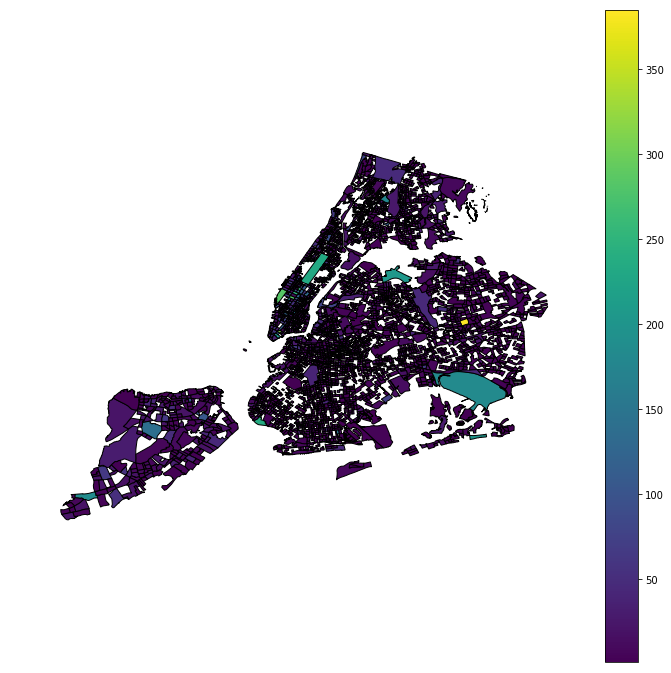

In [106]:
ct_combined_with_tweets.plot(figsize=(12,12),cmap='viridis',column='count',edgecolor='black',legend=True)
plt.axis('off')
plt.savefig('tweets.png')

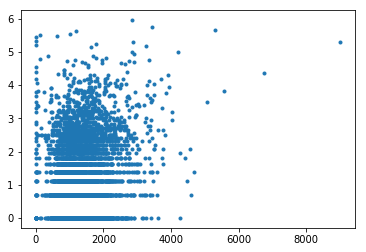

In [23]:
plt.plot(ct_combined_with_tweets['population'],np.log(ct_combined_with_tweets['count']),'.')

In [24]:
arrests_df = pd.read_csv('NYPD_Arrests_Data__Historic_.csv')

In [25]:
arrests_df['ARREST_DATE'] = pd.to_datetime(arrests_df['ARREST_DATE'])

In [26]:
arrests_df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173175353,2018-01-02,273.0,"TAMPERING 1,CRIMINAL",121.0,CRIMINAL MISCHIEF & RELATED OFFENSES,PL 1452000,F,M,30,1,18-24,M,BLACK,999539,239499,40.824040,-73.944760
1,173172232,2018-01-02,848.0,"NY STATE LAWS,UNCLASSIFIED MISDEMEANOR",364.0,OTHER STATE LAWS (NON PENAL LAW),LOC00000AM,M,B,42,2,25-44,M,BLACK,1010861,243330,40.834528,-73.903836
2,173169685,2018-01-02,748.0,"CONTEMPT,CRIMINAL",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 2155006,M,M,32,0,25-44,M,BLACK,1001714,239653,40.824459,-73.936901
3,173163848,2018-01-02,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEANOR",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A2,M,K,63,0,45-64,M,WHITE,1009816,156637,40.596580,-73.907942
4,173188549,2018-01-02,567.0,"MARIJUANA, POSSESSION 4 & 5",235.0,DANGEROUS DRUGS,PL 2211001,M,B,52,0,25-44,M,BLACK,1013947,254987,40.866513,-73.892632


In [27]:
drug_offenses_list = ['CONTROLLED SUBSTANCE, INTENT TO SELL 5',
 'CONTROLLED SUBSTANCE, POSSESSI',
 'CONTROLLED SUBSTANCE, POSSESSION 4',
 'CONTROLLED SUBSTANCE, POSSESSION 5',
 'CONTROLLED SUBSTANCE, POSSESSION 7',
 'CONTROLLED SUBSTANCE, SALE 4',
 'CONTROLLED SUBSTANCE, SALE 5',
 'CONTROLLED SUBSTANCE,INTENT TO SELL 3',
 'CONTROLLED SUBSTANCE,POSSESS.',
 'CONTROLLED SUBSTANCE,POSSESS. 1',
 'CONTROLLED SUBSTANCE,POSSESS. 2',
 'CONTROLLED SUBSTANCE,POSSESS. 3',
 'CONTROLLED SUBSTANCE,SALE 1',
 'CONTROLLED SUBSTANCE,SALE 2',
 'CONTROLLED SUBSTANCE,SALE 3','DRUG PARAPHERNALIA,   POSSESSE',
 'DRUG PARAPHERNALIA,   POSSESSES OR SELLS 1',
 'DRUG PARAPHERNALIA,   POSSESSES OR SELLS 2',
 'DRUG, INJECTION OF','MARIJUANA, POSSESSION',
 'MARIJUANA, POSSESSION 1, 2 & 3',
 'MARIJUANA, POSSESSION 4 & 5',
 'MARIJUANA, SALE 1, 2 & 3',
 'MARIJUANA, SALE 4 & 5',]

In [28]:
arrests_df[arrests_df['PD_DESC'].isin(drug_offenses_list)].to_csv('drug_related_arrests.csv')

In [29]:
arrests_per_cbg = gpd.GeoDataFrame.from_file('arrests_percbg.shp')

In [30]:
arrests_per_cbg.rename(columns={'Count_':'arrests'},inplace=True)
arrests_per_cbg = arrests_per_cbg[['GEOID_Data','arrests']]
arrests_per_cbg.head()

,GEOID_Data,arrests
0,15000US360050175002,33
1,15000US360050141001,3
2,15000US360050145001,13
3,15000US360050075002,26
4,15000US360050418001,16


In [31]:
ct_combined_with_arrests = ct_combined_with_tweets.merge(arrests_per_cbg,on='GEOID_Data')

In [32]:
ct_combined_with_arrests.drop(columns='Majority_r',inplace=True)
ct_combined_with_arrests.rename(columns={'count':'drug_related_tweets'},inplace=True)

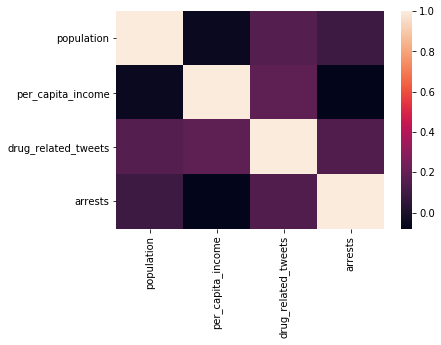

In [107]:
sns.heatmap(ct_combined_with_arrests.corr())
plt.savefig('heatmap.png')

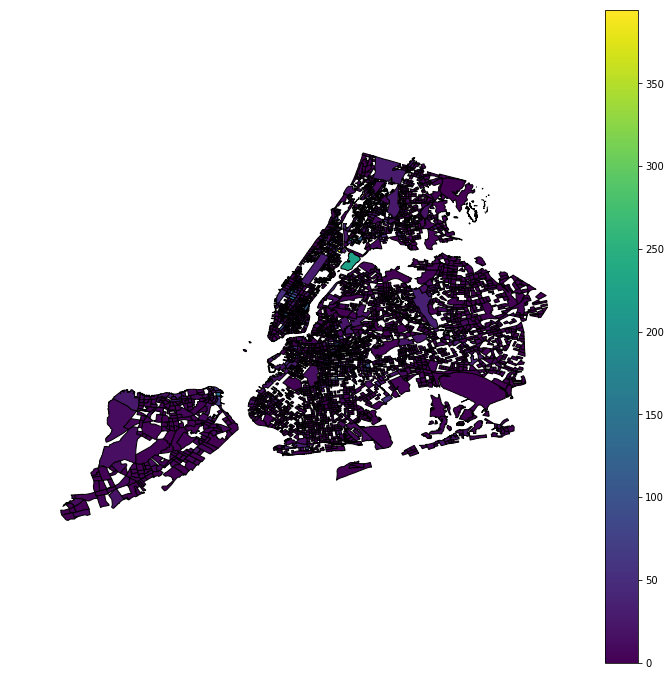

In [105]:
ct_combined_with_arrests.plot(figsize=(12,12),cmap='viridis',column='arrests',edgecolor='black',legend=True)
plt.axis('off')
plt.savefig('arrests.png')

In [194]:
model1 = sm.OLS(ct_combined_with_arrests['arrests'], sm.add_constant(ct_combined_with_arrests['drug_related_tweets'])).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                arrests   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     85.19
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           4.31e-20
Time:                        00:38:43   Log-Likelihood:                -16074.
No. Observations:                3933   AIC:                         3.215e+04
Df Residuals:                    3931   BIC:                         3.217e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.9827    

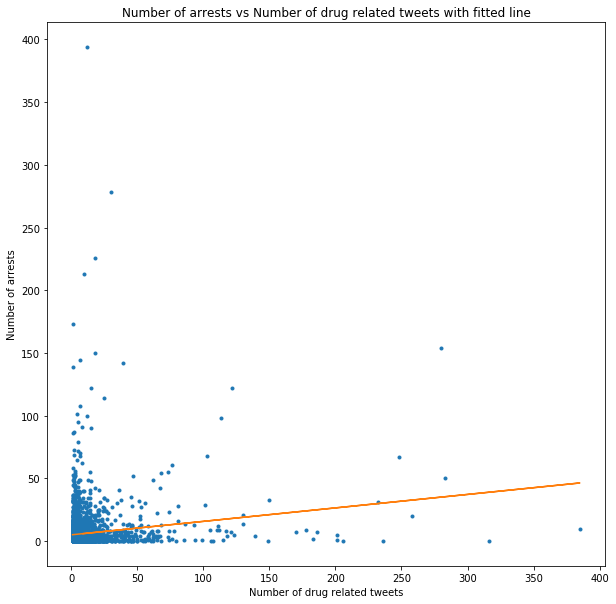

In [203]:
plt.figure(figsize=(10,10))
plt.plot(ct_combined_with_arrests['drug_related_tweets'],ct_combined_with_arrests['arrests'],'.')
plt.plot(ct_combined_with_arrests['drug_related_tweets'],\
         model1.predict(sm.add_constant(ct_combined_with_arrests['drug_related_tweets'])))
plt.xlabel('Number of drug related tweets')
plt.ylabel('Number of arrests')
plt.title('Number of arrests vs Number of drug related tweets with fitted line')
plt.savefig('model1.png')

In [196]:
model2 = sm.OLS(ct_combined_with_arrests['arrests'], sm.add_constant(ct_combined_with_arrests['population'])).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                arrests   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     36.08
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           2.07e-09
Time:                        00:39:31   Log-Likelihood:                -16098.
No. Observations:                3933   AIC:                         3.220e+04
Df Residuals:                    3931   BIC:                         3.221e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0367      0.535      5.672      0.0

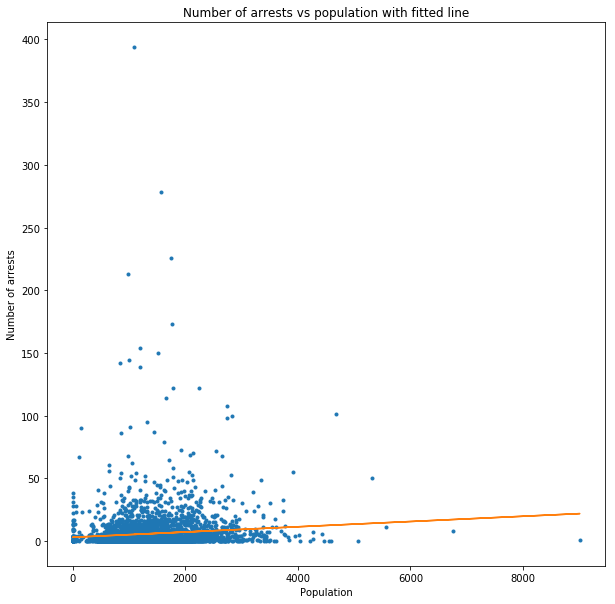

In [202]:
plt.figure(figsize=(10,10))
plt.plot(ct_combined_with_arrests['population'],ct_combined_with_arrests['arrests'],'.')
plt.plot(ct_combined_with_arrests['population'],model2.predict(sm.add_constant(ct_combined_with_arrests['population'])))
plt.xlabel('Population')
plt.ylabel('Number of arrests')
plt.title('Number of arrests vs population with fitted line')
plt.savefig('model2.png')

In [198]:
model3 = sm.OLS(ct_combined_with_arrests['arrests'], sm.add_constant(ct_combined_with_arrests['per_capita_income'])).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                arrests   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     24.74
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           6.84e-07
Time:                        00:40:08   Log-Likelihood:                -16104.
No. Observations:                3933   AIC:                         3.221e+04
Df Residuals:                    3931   BIC:                         3.222e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.2824      0.35

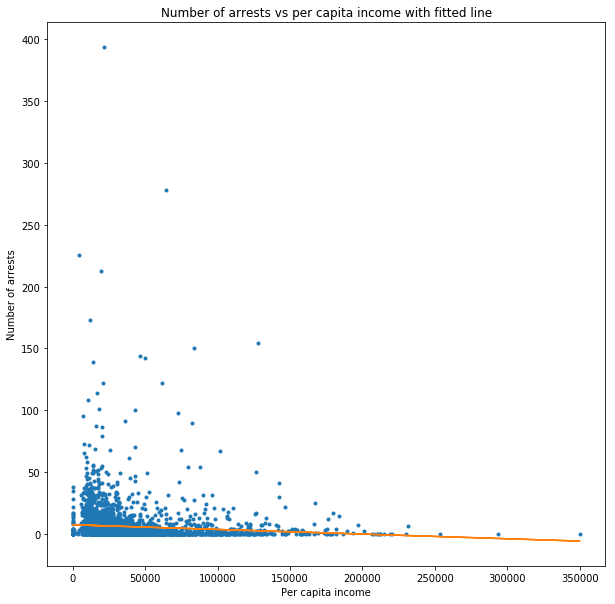

In [204]:
plt.figure(figsize=(10,10))
plt.plot(ct_combined_with_arrests['per_capita_income'],ct_combined_with_arrests['arrests'],'.')
plt.plot(ct_combined_with_arrests['per_capita_income'],\
         model3.predict(sm.add_constant(ct_combined_with_arrests['per_capita_income'])))
plt.xlabel('Per capita income')
plt.ylabel('Number of arrests')
plt.title('Number of arrests vs per capita income with fitted line')
plt.savefig('model3.png')

In [41]:
ct_combined_with_arrests.columns

Index(['GEOID_Data', 'geometry', 'population', 'per_capita_income',
       'census_tract', 'drug_related_tweets', 'arrests'],
      dtype='object')

In [161]:
x_train,x_test,y_train,y_test = train_test_split(ct_combined_with_arrests[['population', 'per_capita_income',
                                                                           'drug_related_tweets']],
                                                 ct_combined_with_arrests['arrests'],test_size=0.2)

In [162]:
regr = RandomForestRegressor(random_state=100)
regr.fit(x_train, y_train) 

C:\Users\siddh\Anaconda3\envs\kaggle\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [163]:
regr.feature_importances_

array([0.32900299, 0.53578282, 0.13521419])

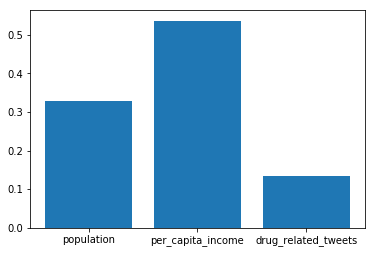

In [164]:
plt.bar(['population', 'per_capita_income','drug_related_tweets'],regr.feature_importances_)
plt.savefig('feature_importance.png')

In [174]:
print(r2_score(y_test,regr.predict(x_test)))

-0.20180615954209502


In [183]:
train_df = x_train
train_df['arrests'] = y_train
test_df = x_test
test_df['arrests'] = y_test

In [116]:
comparrison_df = pd.DataFrame({'Prediction':model4.predict(x_test),'Actual':y_test})
comparrison_df['MSE'] = np.square(comparrison_df['Prediction']-comparrison_df['Actual'])

In [131]:
import statsmodels.formula.api as smf

In [186]:
model3 = smf.ols(formula='arrests ~ population + \
                 per_capita_income + drug_related_tweets',\
                 data=train_df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                arrests   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     35.85
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           8.99e-23
Time:                        00:20:42   Log-Likelihood:                -12615.
No. Observations:                3146   AIC:                         2.524e+04
Df Residuals:                    3142   BIC:                         2.526e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.7981    

In [187]:
print(r2_score(y_test,model3.predict(x_test)))

0.04194713741699174


In [189]:
model4 = smf.ols(formula='arrests ~ population + np.square(population)+ \
                 per_capita_income + np.square(per_capita_income) + drug_related_tweets + np.square(drug_related_tweets)',\
                 data=train_df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                arrests   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     23.71
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.48e-27
Time:                        00:22:11   Log-Likelihood:                -12598.
No. Observations:                3146   AIC:                         2.521e+04
Df Residuals:                    3139   BIC:                         2.525e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [190]:
print(r2_score(y_test,model4.predict(x_test)))

0.04075973689192658


In [192]:
model5 = smf.ols(formula='arrests ~ population + np.power(population,2)+ np.power(population,3)+ \
                 per_capita_income + np.power(per_capita_income,2)+ np.power(per_capita_income,3)\
                 + drug_related_tweets + np.power(drug_related_tweets,2)+ np.power(drug_related_tweets,3)',\
                 data=train_df).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                arrests   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     15.26
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           3.45e-22
Time:                        00:22:39   Log-Likelihood:                -12608.
No. Observations:                3146   AIC:                         2.523e+04
Df Residuals:                    3137   BIC:                         2.529e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [193]:
print(r2_score(y_test,model5.predict(x_test)))

0.015932712013537076
